# Installing Dependencies

In [1]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 13.0 MB/s 


# Importing Dependencies

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors 
import pickle
import seaborn as sns
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import shap

In [3]:
import warnings
warnings.filterwarnings("ignore")

### Global Variables

In [4]:
RANDOM_STATE = 1

# Loading the Data

In [5]:
data = pickle.load(open("/content/NITRRData.pkl", "rb"))
X = data["features"]
y = data["target"]

# Splitting the Data to Train and Test Sets:

Training Data: 80%
Testing Data: 20%

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = RANDOM_STATE)

### Sanity Check

In [7]:
print("Training Feature Matrix shape:", X_train.shape)
print("Training Label Vector shape:", y_train.shape)

print("Testing Feature Matrix shape:", X_test.shape)
print("Testing Label Vector shape:", y_test.shape)

Training Feature Matrix shape: (520, 5)
Training Label Vector shape: (520,)
Testing Feature Matrix shape: (130, 5)
Testing Label Vector shape: (130,)


# Hyperparameter Tuning

In [8]:
rf_model = Pipeline([
    ("scale", StandardScaler()),
    ("rf", RandomForestClassifier(max_depth = 1000))
    ])

param_grid = {"rf__criterion":["gini", "entropy"]}
gscv = GridSearchCV(rf_model, param_grid = param_grid)
gscv.fit(X_train, y_train)
gscv.best_params_

{'rf__criterion': 'entropy'}

# Setting up the model

In [9]:
model = Pipeline([
    ("scale", StandardScaler()),
    ("rf", RandomForestClassifier(max_depth = 100, criterion = "gini"))
    ])
model.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('rf', RandomForestClassifier(max_depth=100))])

# Model Accuracy Score

In [10]:
y_pred = model.predict(X_test)
print("Accuracy Score of the model:", accuracy_score(y_test, y_pred))

Accuracy Score of the model: 0.9461538461538461


### Shap for displaying insights for model output

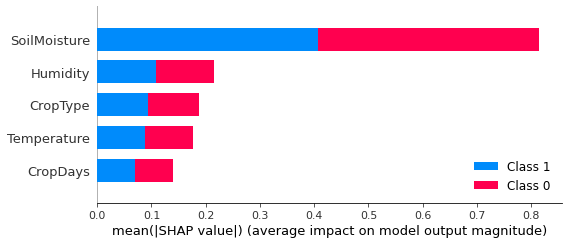

In [11]:
explainer = shap.TreeExplainer(model["rf"])
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

# Eporting the model

In [12]:
with open('rf_model.h5', "wb") as modelfile:
  pickle.dump(model, modelfile) 